In [0]:
from keras.datasets import reuters

In [0]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [78]:
len(train_data)

8982

In [79]:
len(test_data)

2246

In [80]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [0]:
#DECODING THE NEWSWIRE NEWS
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [82]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [0]:
#ENCODING THE DATA
from keras.utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [0]:
def ENCODINGX(sequence,dimension=10000):
  results=np.zeros((len(sequence),dimension))
  for i,sequence in enumerate(sequence):
    results[i,sequence]=1
  return results

In [0]:
xtrain=ENCODINGX(train_data)
xtest=ENCODINGX(test_data)

In [86]:
from keras import models
from keras import layers
xtrain.shape[1]

10000

In [0]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(xtrain.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [88]:
#SETTING VALIDATION SET
x_val=xtrain[:1000]
partial_x_train=xtrain[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_labels=one_hot_train_labels[1000:]

x_val.shape,y_val.shape,partial_x_train.shape,partial_y_labels.shape

((1000, 10000), (1000, 46), (7982, 10000), (7982, 46))

In [89]:
 #TRAINING THE MODEL
history=model.fit(partial_x_train,partial_y_labels,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 219us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 169us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 166us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 169us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 171us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020


In [0]:
import matplotlib.pyplot as plt

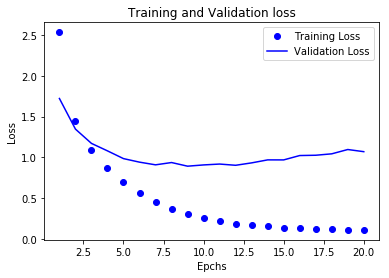

In [91]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title('Training and Validation loss')
plt.xlabel('Epchs')
plt.ylabel('Loss')
plt.legend()
plt.show()

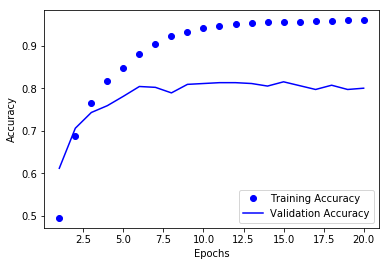

In [92]:
train_acc=history.history['acc']
val_acc=history.history['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs,train_acc,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
#RETRAINING THE MODEL
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(xtrain.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_labels,epochs=9,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 225us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 169us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 165us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 165us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 164us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 163us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

In [94]:
results=model.evaluate(xtest,one_hot_test_labels)

2246/2246 [==============================] - 0s 137us/step


In [95]:
results

[1.0224983157160445, 0.7756010686194165]

In [96]:
xtest.shape, one_hot_test_labels.shape

((2246, 10000), (2246, 46))

In [97]:
train_labels.shape

(8982,)

In [0]:
prediction=model.predict(xtest)

In [99]:
prediction.shape

(2246, 46)

In [100]:
prediction[0].shape

(46,)

In [101]:
np.sum(prediction[0])

0.99999976

In [102]:
np.argmax(prediction[0]) #this is the class with the highest probability

3